In [1]:
import pandas as pd

df = pd.read_csv('cleaned_merged.csv')
df

,Unnamed: 0,Ori Text,Tokens,Input IDs,Label,ProductId,UserId,Score,Summary,CleanedSummary,Sentiment,BERT_Text
0,0,good quality dog food,"['good', 'quality', 'dog', 'food']","[2204, 3737, 3899, 2833]",2,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,good quality dog food,2,[ 1.86347023e-01 -1.68072730e-01 -2.28051543e-...
1,1,not as advertised,"['not', 'as', 'advertised']","[2025, 2004, 17099]",0,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,not as advertised,0,[ 1.42439336e-01 -2.03745186e-01 2.30189532e-...
2,2,"""delight"" says it all","['""', 'delight', '""', 'says', 'it', 'all']","[1000, 12208, 1000, 2758, 2009, 2035]",2,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all","""delight"" says it all",2,[ 1.55589268e-01 -1.47779912e-01 5.19596696e-...
3,3,cough medicine,"['cough', 'medicine']","[19340, 4200]",0,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine,cough medicine,0,[ 2.84347177e-01 1.18847996e-01 -3.19756150e-...
4,4,great taffy,"['great', 'ta', '##ffy']","[2307, 11937, 16329]",2,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy,great taffy,2,[ 7.87579119e-02 4.56854627e-02 4.53394055e-...
...,...,...,...,...,...,...,...,...,...,...,...,...
393555,393555,will not do without,"['will', 'not', 'do', 'without']","[2097, 2025, 2079, 2302]",2,B001EO7N10,A28KG5XORO54AY,5,Will not do without,will not do without,2,[ 1.87258333e-01 1.27170295e-01 4.31861162e-...
393556,393556,disappointed,['disappointed'],[9364],0,B003S1WTCU,A3I8AFVPEE8KI5,2,disappointed,disappointed,0,[-9.47165340e-02 2.12972835e-01 3.75459075e-...
393557,393557,perfect for our maltipoo,"['perfect', 'for', 'our', 'mal', '##tip', '##oo']","[3819, 2005, 2256, 15451, 25101, 9541]",2,B004I613EE,A121AA1GQV751Z,5,Perfect for our maltipoo,perfect for our maltipoo,2,[ 3.62180173e-02 -1.98110163e-01 3.83110881e-...
393558,393558,favorite training and reward treat,"['favorite', 'training', 'and', 'reward', 'tre...","[5440, 2731, 1998, 10377, 7438]",2,B004I613EE,A3IBEVCTXKNOH,5,Favorite Training and reward treat,favorite training and reward treat,2,[-6.12895228e-02 -4.24842209e-01 2.22797886e-...


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Function to clean and parse the BERT output
def parse_bert_output(text):
    # Replace newlines with spaces and strip extra spaces
    cleaned_text = text.replace('\n', ' ').strip()
    # Convert space-separated values into a list of floats
    numbers = list(map(float, cleaned_text.strip("[]").split()))
    return np.array(numbers, dtype=np.float32)

# Apply the function to each row of the 'Summary_BERT_Embeddings' column
df['BERT_Text'] = df['BERT_Text'].apply(parse_bert_output)

# Verify by printing the first few rows of the cleaned embeddings
print(df['BERT_Text'].head())


0    [0.18634702, -0.16807273, -0.22805154, 0.20733...
1    [0.14243934, -0.20374519, 0.23018953, 0.121963...
2    [0.15558927, -0.14777991, 0.5195967, 0.2591147...
3    [0.28434718, 0.118847996, -0.31975615, 0.02868...
4    [0.07875791, 0.045685463, 0.45339406, 0.010217...
Name: BERT_Text, dtype: object


In [3]:
# Convert BERT_Text (assumed to be a list of embeddings) into a NumPy array
X = np.vstack(df['BERT_Text'].values)
y = df['Label'].values  # Target labels

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled.shape)

(920238, 768)
(920238,)


In [6]:
sentiment_counts = pd.Series(y_resampled).value_counts()

print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
2    306746
0    306746
1    306746
Name: count, dtype: int64


In [7]:
# Split into train and test sets
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(X_train_80.shape)
print(X_test_20.shape)
print(y_train_80.shape)
print(y_test_20.shape)

(736190, 768)
(184048, 768)
(736190,)
(184048,)


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_80, y_train_80)


KeyboardInterrupt: 

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_lr = lr_model.predict(X_test_20)

accuracy = accuracy_score(y_test_20, y_pred_lr)
precision = precision_score(y_test_20, y_pred_lr, average='weighted')
recall = recall_score(y_test_20, y_pred_lr, average='weighted')
f1 = f1_score(y_test_20, y_pred_lr, average='weighted')

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-Score: {f1:}")

# Print a classification report
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_lr))


Accuracy: 0.6989481004955229
Precision: 0.6972339077122365
Recall: 0.6989481004955229
F1-Score: 0.6976021127961409

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70     61349
           1       0.64      0.59      0.61     61349
           2       0.77      0.78      0.78     61350

    accuracy                           0.70    184048
   macro avg       0.70      0.70      0.70    184048
weighted avg       0.70      0.70      0.70    184048



In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_80, y_train_80)

y_pred_xgb = xgb_model.predict(X_test_20)

accuracy = accuracy_score(y_test_20, y_pred_xgb)
precision = precision_score(y_test_20, y_pred_xgb, average='weighted')
recall = recall_score(y_test_20, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_20, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-Score: {f1:}")
# Evaluate the XGBoost model
print(classification_report(y_test_20, y_pred_xgb))


Accuracy: 0.7127108145701121
Precision: 0.7125643836495418
Recall: 0.7127108145701121
F1-Score: 0.7125163333862421
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     61349
           1       0.65      0.63      0.64     61349
           2       0.79      0.78      0.79     61350

    accuracy                           0.71    184048
   macro avg       0.71      0.71      0.71    184048
weighted avg       0.71      0.71      0.71    184048



In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_80, y_train_80)

y_pred_knn = knn_model.predict(X_test_20)

print("KNN:")
print(f"Accuracy: {accuracy_score(y_test_20, y_pred_knn)}")
print(f"Precision: {precision_score(y_test_20, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test_20, y_pred_knn, average='weighted')}")
print(f"F1-Score: {f1_score(y_test_20, y_pred_knn, average='weighted')}")
print(classification_report(y_test_20, y_pred_knn))


KNN:
Accuracy: 0.8463281317917065
Precision: 0.8624658314530487
Recall: 0.8463281317917065
F1-Score: 0.841771334490594
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     61349
           1       0.78      0.94      0.85     61349
           2       0.96      0.66      0.78     61350

    accuracy                           0.85    184048
   macro avg       0.86      0.85      0.84    184048
weighted avg       0.86      0.85      0.84    184048



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_80, y_train_80)

y_pred_gb = gb_model.predict(X_test_20)

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test_20, y_pred_gb)}")
print(f"Precision: {precision_score(y_test_20, y_pred_gb, average='weighted')}")
print(f"Recall: {recall_score(y_test_20, y_pred_gb, average='weighted')}")
print(f"F1-Score: {f1_score(y_test_20, y_pred_gb, average='weighted')}")
print(classification_report(y_test_20, y_pred_gb))


Gradient Boosting:
Accuracy: 0.6862068590802399
Precision: 0.6862160926342716
Recall: 0.6862068590802399
F1-Score: 0.6861218989321649
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     61349
           1       0.62      0.60      0.61     61349
           2       0.77      0.76      0.76     61350

    accuracy                           0.69    184048
   macro avg       0.69      0.69      0.69    184048
weighted avg       0.69      0.69      0.69    184048



In [13]:
import torch

print("Is CUDA available:", torch.cuda.is_available())
print("CUDA Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


Is CUDA available: True
CUDA Device Name: NVIDIA GeForce RTX 3090


In [14]:
import torch.nn as nn
import torch.optim as optim

# Define a Simple Neural Network Classifier on Top of BERT Embeddings
class BERT_Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(BERT_Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, embeddings):
        x = self.fc1(embeddings)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [15]:
from torch.utils.data import DataLoader, Dataset, TensorDataset, RandomSampler, SequentialSampler
from transformers import AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize Model
input_size = X_train_80.shape[1]  # Dimension of BERT embeddings
num_classes = len(np.unique(y))  # Number of sentiment classes
model = BERT_Classifier(input_size, num_classes)
model.to(device)


C:\Users\xinyi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BERT_Classifier(
  (fc1): Linear(in_features=768, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [16]:
X_train_tensor = torch.tensor(X_train_80, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_80, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_20, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_20, dtype=torch.long)
# Create PyTorch Dataset and DataLoader
batch_size = 32

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)


In [17]:
# Define Loss Function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)


In [21]:
# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/5, Loss: 0.6685, Accuracy: 0.7007
Epoch 2/5, Loss: 0.6036, Accuracy: 0.7364
Epoch 3/5, Loss: 0.5649, Accuracy: 0.7584
Epoch 4/5, Loss: 0.5344, Accuracy: 0.7748
Epoch 5/5, Loss: 0.5094, Accuracy: 0.7873
Test Accuracy: 0.7864


In [16]:
train_losses = []
val_losses = []

epochs = 5
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct = 0
    total = 0
    
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_accuracy = correct / total
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for embeddings, labels in test_dataloader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            loss = loss_function(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(test_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")


Epoch 1/5 | Train Loss: 0.6687 | Val Loss: 0.6321 | Train Accuracy: 0.7007
Epoch 2/5 | Train Loss: 0.6027 | Val Loss: 0.5901 | Train Accuracy: 0.7371
Epoch 3/5 | Train Loss: 0.5628 | Val Loss: 0.5641 | Train Accuracy: 0.7597
Epoch 4/5 | Train Loss: 0.5323 | Val Loss: 0.5327 | Train Accuracy: 0.7760
Epoch 5/5 | Train Loss: 0.5073 | Val Loss: 0.5141 | Train Accuracy: 0.7887


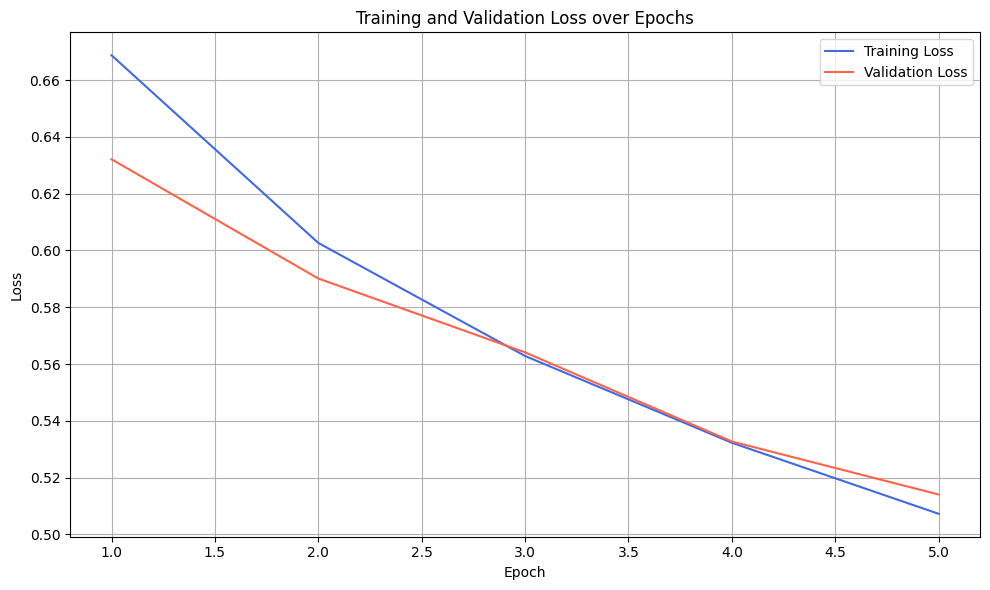

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', color='royalblue')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', color='tomato')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/10, Loss: 0.4883, Accuracy: 0.7986
Epoch 2/10, Loss: 0.4705, Accuracy: 0.8072
Epoch 3/10, Loss: 0.4546, Accuracy: 0.8149
Epoch 4/10, Loss: 0.4407, Accuracy: 0.8217
Epoch 5/10, Loss: 0.4290, Accuracy: 0.8279
Epoch 6/10, Loss: 0.4180, Accuracy: 0.8332
Epoch 7/10, Loss: 0.4083, Accuracy: 0.8374
Epoch 8/10, Loss: 0.3993, Accuracy: 0.8413
Epoch 9/10, Loss: 0.3915, Accuracy: 0.8451
Epoch 10/10, Loss: 0.3839, Accuracy: 0.8485
Test Accuracy: 0.8303


In [23]:
# Training Loop
epochs = 15
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/15, Loss: 0.3771, Accuracy: 0.8514
Epoch 2/15, Loss: 0.3710, Accuracy: 0.8542
Epoch 3/15, Loss: 0.3652, Accuracy: 0.8567
Epoch 4/15, Loss: 0.3599, Accuracy: 0.8589
Epoch 5/15, Loss: 0.3547, Accuracy: 0.8615
Epoch 6/15, Loss: 0.3499, Accuracy: 0.8634
Epoch 7/15, Loss: 0.3452, Accuracy: 0.8651
Epoch 8/15, Loss: 0.3413, Accuracy: 0.8672
Epoch 9/15, Loss: 0.3372, Accuracy: 0.8688
Epoch 10/15, Loss: 0.3330, Accuracy: 0.8703
Epoch 11/15, Loss: 0.3297, Accuracy: 0.8714
Epoch 12/15, Loss: 0.3264, Accuracy: 0.8734
Epoch 13/15, Loss: 0.3228, Accuracy: 0.8745
Epoch 14/15, Loss: 0.3196, Accuracy: 0.8761
Epoch 15/15, Loss: 0.3166, Accuracy: 0.8774
Test Accuracy: 0.8507


In [24]:
# Training Loop
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/20, Loss: 0.3136, Accuracy: 0.8789
Epoch 2/20, Loss: 0.3114, Accuracy: 0.8796
Epoch 3/20, Loss: 0.3085, Accuracy: 0.8808
Epoch 4/20, Loss: 0.3057, Accuracy: 0.8816
Epoch 5/20, Loss: 0.3037, Accuracy: 0.8827
Epoch 6/20, Loss: 0.3010, Accuracy: 0.8837
Epoch 7/20, Loss: 0.2991, Accuracy: 0.8847
Epoch 8/20, Loss: 0.2966, Accuracy: 0.8852
Epoch 9/20, Loss: 0.2947, Accuracy: 0.8862
Epoch 10/20, Loss: 0.2926, Accuracy: 0.8872
Epoch 11/20, Loss: 0.2908, Accuracy: 0.8875
Epoch 12/20, Loss: 0.2888, Accuracy: 0.8888
Epoch 13/20, Loss: 0.2872, Accuracy: 0.8894
Epoch 14/20, Loss: 0.2855, Accuracy: 0.8900
Epoch 15/20, Loss: 0.2835, Accuracy: 0.8908
Epoch 16/20, Loss: 0.2817, Accuracy: 0.8917
Epoch 17/20, Loss: 0.2801, Accuracy: 0.8919
Epoch 18/20, Loss: 0.2787, Accuracy: 0.8925
Epoch 19/20, Loss: 0.2770, Accuracy: 0.8935
Epoch 20/20, Loss: 0.2751, Accuracy: 0.8939
Test Accuracy: 0.8577


In [25]:
# Training Loop
epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/30, Loss: 0.2742, Accuracy: 0.8947
Epoch 2/30, Loss: 0.2726, Accuracy: 0.8950
Epoch 3/30, Loss: 0.2709, Accuracy: 0.8959
Epoch 4/30, Loss: 0.2695, Accuracy: 0.8963
Epoch 5/30, Loss: 0.2685, Accuracy: 0.8964
Epoch 6/30, Loss: 0.2672, Accuracy: 0.8976
Epoch 7/30, Loss: 0.2660, Accuracy: 0.8975
Epoch 8/30, Loss: 0.2647, Accuracy: 0.8982
Epoch 9/30, Loss: 0.2632, Accuracy: 0.8990
Epoch 10/30, Loss: 0.2626, Accuracy: 0.8987
Epoch 11/30, Loss: 0.2609, Accuracy: 0.8996
Epoch 12/30, Loss: 0.2602, Accuracy: 0.9000
Epoch 13/30, Loss: 0.2589, Accuracy: 0.9004
Epoch 14/30, Loss: 0.2577, Accuracy: 0.9010
Epoch 15/30, Loss: 0.2569, Accuracy: 0.9014
Epoch 16/30, Loss: 0.2555, Accuracy: 0.9019
Epoch 17/30, Loss: 0.2550, Accuracy: 0.9022
Epoch 18/30, Loss: 0.2539, Accuracy: 0.9024
Epoch 19/30, Loss: 0.2520, Accuracy: 0.9034
Epoch 20/30, Loss: 0.2518, Accuracy: 0.9035
Epoch 21/30, Loss: 0.2507, Accuracy: 0.9036
Epoch 22/30, Loss: 0.2496, Accuracy: 0.9043
Epoch 23/30, Loss: 0.2489, Accuracy: 0.90

In [26]:
# Training Loop
epochs = 40
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/40, Loss: 0.2424, Accuracy: 0.9069
Epoch 2/40, Loss: 0.2412, Accuracy: 0.9077
Epoch 3/40, Loss: 0.2404, Accuracy: 0.9078
Epoch 4/40, Loss: 0.2400, Accuracy: 0.9080
Epoch 5/40, Loss: 0.2392, Accuracy: 0.9082
Epoch 6/40, Loss: 0.2380, Accuracy: 0.9087
Epoch 7/40, Loss: 0.2377, Accuracy: 0.9088
Epoch 8/40, Loss: 0.2370, Accuracy: 0.9090
Epoch 9/40, Loss: 0.2362, Accuracy: 0.9091
Epoch 10/40, Loss: 0.2354, Accuracy: 0.9098
Epoch 11/40, Loss: 0.2347, Accuracy: 0.9096
Epoch 12/40, Loss: 0.2341, Accuracy: 0.9102
Epoch 13/40, Loss: 0.2334, Accuracy: 0.9103
Epoch 14/40, Loss: 0.2330, Accuracy: 0.9104
Epoch 15/40, Loss: 0.2321, Accuracy: 0.9110
Epoch 16/40, Loss: 0.2314, Accuracy: 0.9115
Epoch 17/40, Loss: 0.2310, Accuracy: 0.9113
Epoch 18/40, Loss: 0.2302, Accuracy: 0.9113
Epoch 19/40, Loss: 0.2295, Accuracy: 0.9120
Epoch 20/40, Loss: 0.2288, Accuracy: 0.9117
Epoch 21/40, Loss: 0.2284, Accuracy: 0.9126
Epoch 22/40, Loss: 0.2278, Accuracy: 0.9125
Epoch 23/40, Loss: 0.2275, Accuracy: 0.91

In [27]:
# Training Loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/50, Loss: 0.2179, Accuracy: 0.9164
Epoch 2/50, Loss: 0.2173, Accuracy: 0.9162
Epoch 3/50, Loss: 0.2169, Accuracy: 0.9161
Epoch 4/50, Loss: 0.2164, Accuracy: 0.9172
Epoch 5/50, Loss: 0.2163, Accuracy: 0.9167
Epoch 6/50, Loss: 0.2156, Accuracy: 0.9168
Epoch 7/50, Loss: 0.2152, Accuracy: 0.9172
Epoch 8/50, Loss: 0.2148, Accuracy: 0.9172
Epoch 9/50, Loss: 0.2142, Accuracy: 0.9177
Epoch 10/50, Loss: 0.2141, Accuracy: 0.9176
Epoch 11/50, Loss: 0.2133, Accuracy: 0.9181
Epoch 12/50, Loss: 0.2129, Accuracy: 0.9183
Epoch 13/50, Loss: 0.2125, Accuracy: 0.9183
Epoch 14/50, Loss: 0.2119, Accuracy: 0.9182
Epoch 15/50, Loss: 0.2118, Accuracy: 0.9183
Epoch 16/50, Loss: 0.2114, Accuracy: 0.9182
Epoch 17/50, Loss: 0.2104, Accuracy: 0.9191
Epoch 18/50, Loss: 0.2106, Accuracy: 0.9188
Epoch 19/50, Loss: 0.2100, Accuracy: 0.9191
Epoch 20/50, Loss: 0.2097, Accuracy: 0.9191
Epoch 21/50, Loss: 0.2096, Accuracy: 0.9192
Epoch 22/50, Loss: 0.2085, Accuracy: 0.9197
Epoch 23/50, Loss: 0.2087, Accuracy: 0.91

In [28]:
# Training Loop
epochs = 60
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/60, Loss: 0.1994, Accuracy: 0.9233
Epoch 2/60, Loss: 0.1992, Accuracy: 0.9229
Epoch 3/60, Loss: 0.1985, Accuracy: 0.9234
Epoch 4/60, Loss: 0.1986, Accuracy: 0.9237
Epoch 5/60, Loss: 0.1978, Accuracy: 0.9236
Epoch 6/60, Loss: 0.1979, Accuracy: 0.9239
Epoch 7/60, Loss: 0.1975, Accuracy: 0.9236
Epoch 8/60, Loss: 0.1970, Accuracy: 0.9242
Epoch 9/60, Loss: 0.1969, Accuracy: 0.9239
Epoch 10/60, Loss: 0.1964, Accuracy: 0.9243
Epoch 11/60, Loss: 0.1962, Accuracy: 0.9245
Epoch 12/60, Loss: 0.1962, Accuracy: 0.9241
Epoch 13/60, Loss: 0.1960, Accuracy: 0.9245
Epoch 14/60, Loss: 0.1957, Accuracy: 0.9246
Epoch 15/60, Loss: 0.1956, Accuracy: 0.9244
Epoch 16/60, Loss: 0.1950, Accuracy: 0.9248
Epoch 17/60, Loss: 0.1950, Accuracy: 0.9246
Epoch 18/60, Loss: 0.1945, Accuracy: 0.9249
Epoch 19/60, Loss: 0.1941, Accuracy: 0.9252
Epoch 20/60, Loss: 0.1937, Accuracy: 0.9252
Epoch 21/60, Loss: 0.1936, Accuracy: 0.9251
Epoch 22/60, Loss: 0.1937, Accuracy: 0.9254
Epoch 23/60, Loss: 0.1927, Accuracy: 0.92

In [29]:
# Training Loop
epochs = 70
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/70, Loss: 0.1845, Accuracy: 0.9287
Epoch 2/70, Loss: 0.1840, Accuracy: 0.9287
Epoch 3/70, Loss: 0.1838, Accuracy: 0.9292
Epoch 4/70, Loss: 0.1834, Accuracy: 0.9291
Epoch 5/70, Loss: 0.1834, Accuracy: 0.9289
Epoch 6/70, Loss: 0.1836, Accuracy: 0.9290
Epoch 7/70, Loss: 0.1829, Accuracy: 0.9294
Epoch 8/70, Loss: 0.1831, Accuracy: 0.9293
Epoch 9/70, Loss: 0.1828, Accuracy: 0.9294
Epoch 10/70, Loss: 0.1827, Accuracy: 0.9291
Epoch 11/70, Loss: 0.1825, Accuracy: 0.9291
Epoch 12/70, Loss: 0.1822, Accuracy: 0.9293
Epoch 13/70, Loss: 0.1821, Accuracy: 0.9293
Epoch 14/70, Loss: 0.1820, Accuracy: 0.9294
Epoch 15/70, Loss: 0.1818, Accuracy: 0.9296
Epoch 16/70, Loss: 0.1812, Accuracy: 0.9300
Epoch 17/70, Loss: 0.1813, Accuracy: 0.9298
Epoch 18/70, Loss: 0.1815, Accuracy: 0.9296
Epoch 19/70, Loss: 0.1812, Accuracy: 0.9298
Epoch 20/70, Loss: 0.1807, Accuracy: 0.9299
Epoch 21/70, Loss: 0.1804, Accuracy: 0.9303
Epoch 22/70, Loss: 0.1804, Accuracy: 0.9300
Epoch 23/70, Loss: 0.1802, Accuracy: 0.93

In [30]:
# Training Loop
epochs = 80
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/80, Loss: 0.1722, Accuracy: 0.9334
Epoch 2/80, Loss: 0.1724, Accuracy: 0.9331
Epoch 3/80, Loss: 0.1721, Accuracy: 0.9333
Epoch 4/80, Loss: 0.1716, Accuracy: 0.9334
Epoch 5/80, Loss: 0.1718, Accuracy: 0.9335
Epoch 6/80, Loss: 0.1716, Accuracy: 0.9331
Epoch 7/80, Loss: 0.1716, Accuracy: 0.9336
Epoch 8/80, Loss: 0.1712, Accuracy: 0.9335
Epoch 9/80, Loss: 0.1715, Accuracy: 0.9335
Epoch 10/80, Loss: 0.1712, Accuracy: 0.9334
Epoch 11/80, Loss: 0.1712, Accuracy: 0.9332
Epoch 12/80, Loss: 0.1709, Accuracy: 0.9335
Epoch 13/80, Loss: 0.1705, Accuracy: 0.9338
Epoch 14/80, Loss: 0.1707, Accuracy: 0.9340
Epoch 15/80, Loss: 0.1701, Accuracy: 0.9338
Epoch 16/80, Loss: 0.1705, Accuracy: 0.9338
Epoch 17/80, Loss: 0.1701, Accuracy: 0.9340
Epoch 18/80, Loss: 0.1699, Accuracy: 0.9341
Epoch 19/80, Loss: 0.1700, Accuracy: 0.9339
Epoch 20/80, Loss: 0.1697, Accuracy: 0.9340
Epoch 21/80, Loss: 0.1698, Accuracy: 0.9340
Epoch 22/80, Loss: 0.1694, Accuracy: 0.9340
Epoch 23/80, Loss: 0.1694, Accuracy: 0.93

In [31]:
# Training Loop
epochs = 90
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/90, Loss: 0.1626, Accuracy: 0.9368
Epoch 2/90, Loss: 0.1621, Accuracy: 0.9368
Epoch 3/90, Loss: 0.1621, Accuracy: 0.9368
Epoch 4/90, Loss: 0.1622, Accuracy: 0.9367
Epoch 5/90, Loss: 0.1621, Accuracy: 0.9368
Epoch 6/90, Loss: 0.1617, Accuracy: 0.9371
Epoch 7/90, Loss: 0.1614, Accuracy: 0.9372
Epoch 8/90, Loss: 0.1618, Accuracy: 0.9368
Epoch 9/90, Loss: 0.1613, Accuracy: 0.9372
Epoch 10/90, Loss: 0.1615, Accuracy: 0.9371
Epoch 11/90, Loss: 0.1610, Accuracy: 0.9373
Epoch 12/90, Loss: 0.1612, Accuracy: 0.9373
Epoch 13/90, Loss: 0.1610, Accuracy: 0.9374
Epoch 14/90, Loss: 0.1607, Accuracy: 0.9374
Epoch 15/90, Loss: 0.1606, Accuracy: 0.9372
Epoch 16/90, Loss: 0.1606, Accuracy: 0.9373
Epoch 17/90, Loss: 0.1607, Accuracy: 0.9374
Epoch 18/90, Loss: 0.1604, Accuracy: 0.9376
Epoch 19/90, Loss: 0.1604, Accuracy: 0.9373
Epoch 20/90, Loss: 0.1604, Accuracy: 0.9374
Epoch 21/90, Loss: 0.1600, Accuracy: 0.9377
Epoch 22/90, Loss: 0.1602, Accuracy: 0.9376
Epoch 23/90, Loss: 0.1601, Accuracy: 0.93

In [ ]:
# Training Loop
epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(embeddings)  
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_dataloader):.4f}, Accuracy: {correct/total:.4f}")

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for embeddings, labels in test_dataloader:  
        embeddings, labels = embeddings.to(device), labels.to(device) 
        outputs = model(embeddings) 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {correct/total:.4f}")


Epoch 1/100, Loss: 0.1490, Accuracy: 0.9419
Epoch 2/100, Loss: 0.1494, Accuracy: 0.9413
Epoch 3/100, Loss: 0.1491, Accuracy: 0.9417
Epoch 4/100, Loss: 0.1491, Accuracy: 0.9418
Epoch 5/100, Loss: 0.1489, Accuracy: 0.9415
Epoch 6/100, Loss: 0.1489, Accuracy: 0.9416
Epoch 7/100, Loss: 0.1490, Accuracy: 0.9419
Epoch 8/100, Loss: 0.1488, Accuracy: 0.9418
Epoch 9/100, Loss: 0.1488, Accuracy: 0.9417
Epoch 10/100, Loss: 0.1486, Accuracy: 0.9420
Epoch 11/100, Loss: 0.1486, Accuracy: 0.9417
Epoch 12/100, Loss: 0.1484, Accuracy: 0.9421
Epoch 13/100, Loss: 0.1484, Accuracy: 0.9419
Epoch 14/100, Loss: 0.1484, Accuracy: 0.9419
Epoch 15/100, Loss: 0.1482, Accuracy: 0.9419
Epoch 16/100, Loss: 0.1481, Accuracy: 0.9421
Epoch 17/100, Loss: 0.1481, Accuracy: 0.9420
Epoch 18/100, Loss: 0.1480, Accuracy: 0.9421
Epoch 19/100, Loss: 0.1480, Accuracy: 0.9422
Epoch 20/100, Loss: 0.1478, Accuracy: 0.9421
Epoch 21/100, Loss: 0.1480, Accuracy: 0.9420
Epoch 22/100, Loss: 0.1479, Accuracy: 0.9418
Epoch 23/100, Loss:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', color='royalblue')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', color='tomato')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Evaluation
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        X_batch, y_batch = batch
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = y_batch.cpu().numpy()

        predictions.extend(preds)
        true_labels.extend(labels)


In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Classification Report
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy:}")
print("Classification Report:\n", classification_report(true_labels, predictions))

Test Accuracy: 0.8953533860731983
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     61349
           1       0.86      0.92      0.89     61349
           2       0.94      0.86      0.90     61350

    accuracy                           0.90    184048
   macro avg       0.90      0.90      0.90    184048
weighted avg       0.90      0.90      0.90    184048



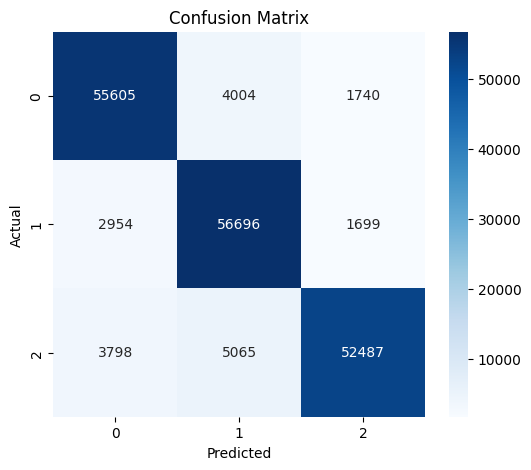

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save model weights
torch.save(model.state_dict(), "cbf_model.pth")


In [ ]:
# Initialize the model again (same architecture)
model = BERT_Classifier(input_size, num_classes)

# Load the saved weights
model.load_state_dict(torch.load("cbf_model.pth"))
model.eval()  # Set the model to evaluation mode


BERT_Classifier(
  (fc1): Linear(in_features=768, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

Loaded data from C:/Users/mochi/OneDrive/Documents/MMU/Bachelors in Computer Science/FYP/code/cleaned_merged.csv. Shape: (393560, 2)
Found 256027 unique users.
Found 67553 unique items.
User encoder saved to user_encoder.pkl
Item encoder saved to item_encoder.pkl


In [ ]:
# import pickle
# import numpy as np # If the pkl might contain numpy arrays

# file_path = 'item_encoder.pkl'
# # file_path = 'user_encoder.pkl'

# with open(file_path, 'rb') as f:
#     loaded_data = pickle.load(f)
    
# # Now inspect the loaded_data variable
# print(type(loaded_data))
# print(len(loaded_data)) # If it's a list/dict/array
# print(loaded_data[:10]) # Print the first 10 elements if it's a list/array
# # Or explore keys if it's a dictionary
# # print(list(loaded_data.keys())[:10]) 

<class 'list'>
67553
['0006641040', '141278509X', '2734888454', '2841233731', '7800648702', '9376674501', 'B00002N8SM', 'B00002NCJC', 'B00002Z754', 'B00004CXX9']
